In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [19]:
from pylab import *

In [27]:
# %load C:\Users\catic\Documents\EECE 2300\python\crime_term_project\crime_term_project\data.py

"""
Module for data handling. Specifically, Crime Dataset.
"""
import pandas as pd
import numpy as np



def load_data(filename):
    """
    Function to load data and attribute
    :param filename: raw data
    :return: creates dataframe from raw data
    """

    df = pd.read_csv(filename, header=None)

    return (df)



def summarize_data (df) :
    """
    Function to summarize data and find number of missing datapoints for each column..
    :param df: dataframe
    :return: new df with an additional row with coonts of missing values
    """
    count = 0
    n_a = 0
    df.loc['Total_Stat_Count'] = None
    for col in range(0, len(df.columns)):
        count = 0
        n_a = 0
        for row in range(0, len(df.index) - 1):
            if df[col][row] == '?':
                n_a = n_a + 1
            else:
                count = count + 1
        df[col][row + 1] = count
    return (df)



def label_data (attributesfile, df):
    """
    Function that loads the attributes file and adds it to dataframe as column labels
    :param attributesfile: file with attributes
    :param df: dataframe with data
    :return: labeled dataframe
    """
    attributes = pd.read_csv(attributesfile, header=None)  #creates dataframe from attributes file
    temp = pd.DataFrame()   #temporary dataframe to store attributes in
    attribute = attributes[0].str.split(' ').str[1] #gets just the attribute name
    temp[0] = attribute
    temp = temp.transpose()
    header = temp.iloc[0]   #gets the row of attributes from temp
    labeled_df = df.rename(columns = header)    #sets the attributes as column labels
    return(labeled_df)

def clean_data (df2):
    """
    Function to delete columns with 10% data missing
    :param df2: summarized dataframe
    :return: cleaned df
    """
    num_rows = int(len(df2.index.values)-1) #gets number of attributes
    for column in df2:
        if df2.loc['Total_Stat_Count'][column] < (.90*num_rows):    #gets rows with more than 10% data points missing
            df2 = df2.drop([column],  axis=1)   #deletes rows
    df2 = df2.drop(['Total_Stat_Count'], axis=0)        
    return df2


def select_attributes(list_attributes):
    """
    Function to delete all unwanted attributes
    :param list_attributes: list of attributes we want to analyze
    :return: df with selected attributes
    """
    pass

#potential fcn to delete rows with missing data points

def decision_tree_model(df):
    """
    Function to call model on our dataframe and classifies cities
    :param df: dataframe
    :return: classified cities based on model
    """
    pass

def naive_bayesian_model(df):
    """
       Function to call model on our dataframe and classifies cities
       :param df: dataframe
       :return: classifies cities based on model
       """
    pass

def perf_eval (our_results, actual_results):
    """
    Function to compare our results to the original data
    :param our_results: results from model
    :param actual_results: results from original dataframe
    :return: evaluation of the accuracy of the models
    """
    pass


def main():
    df = load_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.data.txt')
    #print (df)
    df2 = summarize_data(df)
    #print(df2)
    df_attributes = label_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.attributes.txt', df2)
    #print(df_attributes)
    cleaned_df = clean_data(df_attributes)
    #print (cleaned_df)

if __name__ == '__main__':
    main()



C:\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
df = load_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.data.txt')
df2 = summarize_data(df)
df_attributes = label_data('C:\\Users\\catic\\Documents\\EECE 2300\\python\\crime_term_project\\data\\raw\\communities.attributes.txt', df2)
cleaned_df = clean_data(df_attributes)

C:\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


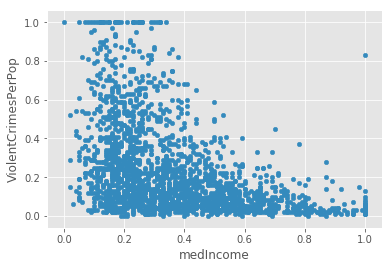

In [48]:
cleaned_df.plot.scatter(x="medIncome", y= "ViolentCrimesPerPop")

In [49]:
cleaned_df['ViolentCrimesPerPop'].mean()

0.23797893681043028

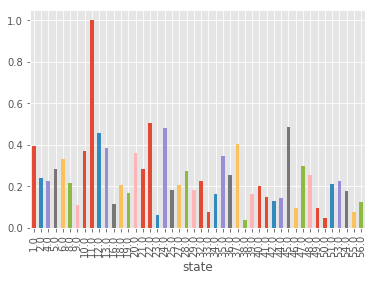

In [53]:
grouped_state = cleaned_df.groupby('state').mean()
grouped_state['ViolentCrimesPerPop'].plot.bar()

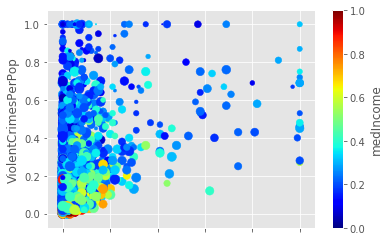

In [79]:
size = cleaned_df['racePctWhite']*100
cleaned_df.plot.scatter(x = "numbUrban", y = "ViolentCrimesPerPop", s = size, c= 'medIncome', colormap= 'jet' )

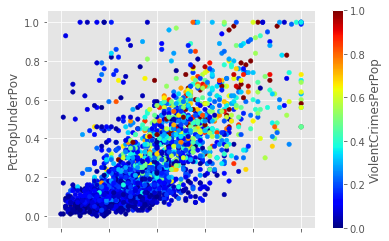

In [85]:
cleaned_df.plot.scatter(x='PctNotHSGrad', y='PctPopUnderPov', c = 'ViolentCrimesPerPop', colormap= 'jet')